In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import statsmodels.api as sm

In [18]:
personas = {
  "No Persona": 1734395183,
  "young_person": 1738885303,
  "older_person": 1738885546,
  "man": 1738885722,
  "woman": 1738885914,
  "competitive_person": 1738886203,
  "introvert": 1738886397,
  "extrovert": 1738886580
}

In [19]:

FIGURE_SIZE = (12, 4)

In [20]:
# Load Datasets
personas_df = []
for index,(persona,_id) in enumerate(personas.items()):
  pp_df = pd.read_csv(f"dist/pp_df_{_id}.csv")
  ps_df = pd.read_csv(f"dist/ps_df_{_id}.csv")
  ps_df['index'] = index+1
  pp_df['index'] = index+1
  pp_df['game'] = "play_for_pair"
  ps_df['game'] = "play_for_self"
  pp_df['persona'] = persona.replace('person', '').replace('_', ' ').strip().title()
  ps_df['persona'] = persona.replace('person', '').replace('_', ' ').strip().title()
  personas_df.append(pp_df)
  personas_df.append(ps_df)
personas_df = pd.concat(personas_df)
personas_df

,player,period,stag,payoff,index,game,persona
0,Team1,0,True,9,1,play_for_pair,No Persona
1,Team2,0,True,9,1,play_for_pair,No Persona
2,Team1,1,True,9,1,play_for_pair,No Persona
3,Team2,1,True,9,1,play_for_pair,No Persona
4,Team1,2,True,9,1,play_for_pair,No Persona
...,...,...,...,...,...,...,...
4495,Player2,12,True,9,8,play_for_self,Extrovert
4496,Player1,13,True,9,8,play_for_self,Extrovert
4497,Player2,13,True,9,8,play_for_self,Extrovert
4498,Player1,14,True,9,8,play_for_self,Extrovert


In [21]:
# For each game and persona get the mean of stag
mean_stag = personas_df.groupby(['game','persona']).agg({'stag':'mean', 'index': 'median'}).reset_index()
mean_stag['count'] = personas_df.groupby(['game','persona']).size().values.astype(int)
humans = pd.DataFrame([
    {'game': 'play_for_pair', 'persona': 'Charness', 'stag': .439, 'count': 1, 'index': -1},
    {'game': 'play_for_self', 'persona': 'Charness', 'stag': .612, 'count': 1, 'index': -1},
    ])
mean_stag = pd.concat([mean_stag, humans]).reset_index(drop=True)
mean_stag.sort_values('index',inplace=True)
mean_stag

,game,persona,stag,index,count
17,play_for_self,Charness,0.612000,-1.0,1
16,play_for_pair,Charness,0.439000,-1.0,1
4,play_for_pair,No Persona,0.760267,1.0,15000
12,play_for_self,No Persona,0.611267,1.0,15000
15,play_for_self,Young,0.728222,2.0,4500
7,play_for_pair,Young,0.710889,2.0,4500
5,play_for_pair,Older,0.428667,3.0,4500
13,play_for_self,Older,0.737111,3.0,4500
11,play_for_self,Man,0.786667,4.0,4500
3,play_for_pair,Man,0.555556,4.0,4500


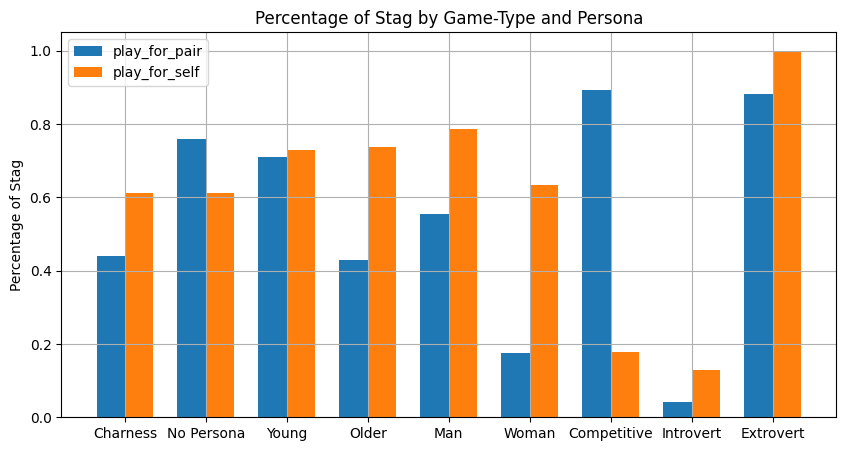

In [22]:
#pp_mean = pd.read_csv('dist/personalities_pp_mean.csv')
#ps_mean = pd.read_csv('dist/personalities_ps_mean.csv')
pp_mean = mean_stag[mean_stag['game']=='play_for_pair']
ps_mean = mean_stag[mean_stag['game']=='play_for_self']
# Plot
fig, ax = plt.subplots(figsize=(10, 5))
width = 0.35
x = np.arange(len(pp_mean))
pp_bars = ax.bar(x - width/2, pp_mean['stag'], width, label='play_for_pair')
ps_bars = ax.bar(x + width/2, ps_mean['stag'], width, label='play_for_self')

# Add dotted horizontal line at Charness
#ax.axhline(y=.439, color='purple', linestyle='--', alpha=0.5)
#ax.axhline(y=.612, color='orange', linestyle='--', alpha=.5)

ax.set_ylabel('Percentage of Stag')
ax.set_title('Percentage of Stag by Game-Type and Persona')
ax.set_xticks(x)
ax.set_xticklabels(pp_mean['persona'])
ax.legend()
plt.grid()

plt.show()


In [23]:
mean_stag

,game,persona,stag,index,count
17,play_for_self,Charness,0.612000,-1.0,1
16,play_for_pair,Charness,0.439000,-1.0,1
4,play_for_pair,No Persona,0.760267,1.0,15000
12,play_for_self,No Persona,0.611267,1.0,15000
15,play_for_self,Young,0.728222,2.0,4500
7,play_for_pair,Young,0.710889,2.0,4500
5,play_for_pair,Older,0.428667,3.0,4500
13,play_for_self,Older,0.737111,3.0,4500
11,play_for_self,Man,0.786667,4.0,4500
3,play_for_pair,Man,0.555556,4.0,4500


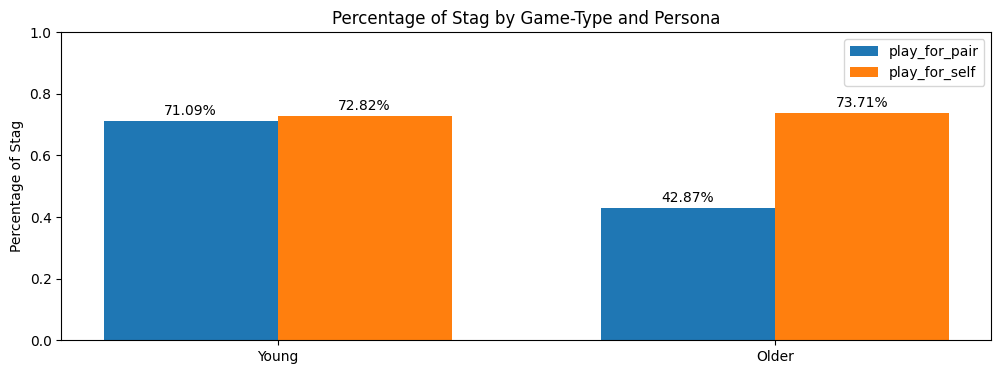

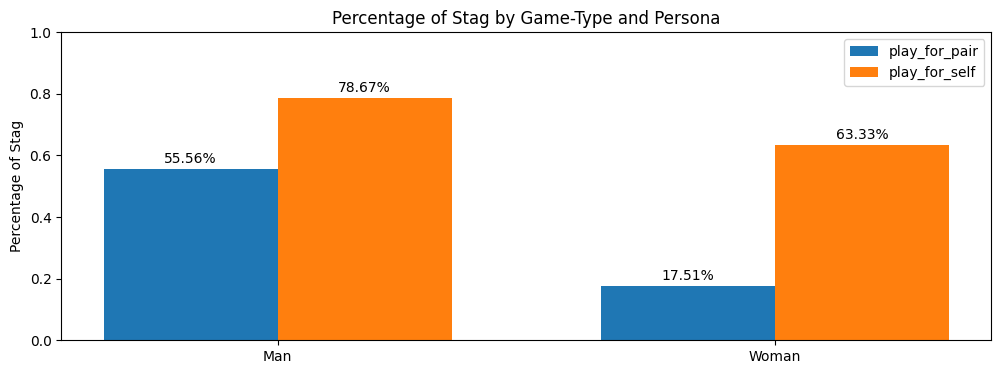

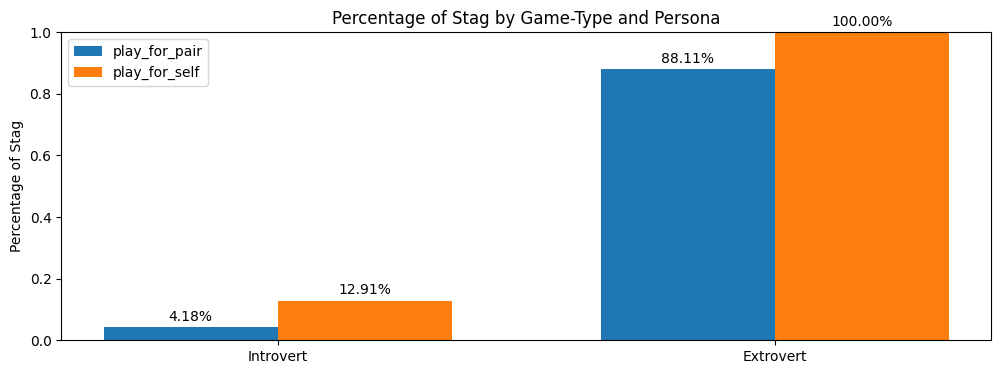

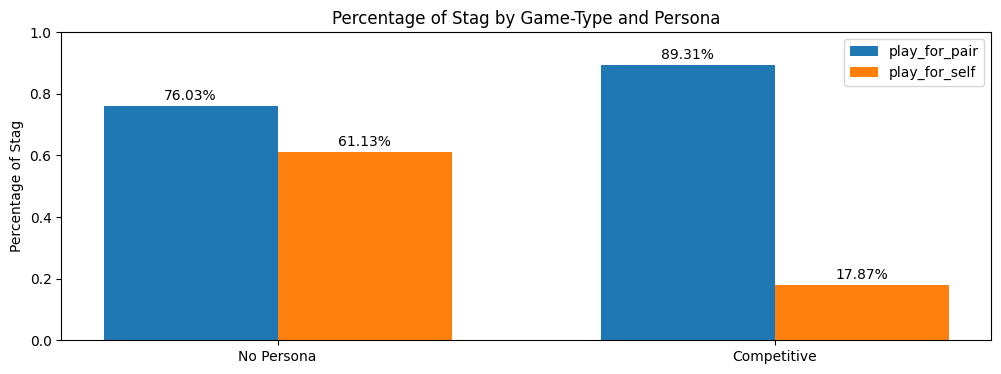

In [24]:
#pp_mean = pd.read_csv('dist/personalities_pp_mean.csv')
#ps_mean = pd.read_csv('dist/personalities_ps_mean.csv')
persona_pairs = [
    ['Young', 'Older'],
    ['Man', 'Woman'],
    ['Introvert', 'Extrovert'],
    ['Competitive', 'No Persona']
]
for pairs in persona_pairs:
    pp_mean = mean_stag[(mean_stag['game']=='play_for_pair') & (mean_stag['persona'].isin(pairs))]
    ps_mean = mean_stag[(mean_stag['game']=='play_for_self') & (mean_stag['persona'].isin(pairs))]
    # Plot
    
    fig, ax = plt.subplots(figsize=FIGURE_SIZE)
    width = 0.35
    x = np.arange(len(pp_mean))
    pp_bars = ax.bar(x - width/2, pp_mean['stag'], width, label='play_for_pair')
    ps_bars = ax.bar(x + width/2, ps_mean['stag'], width, label='play_for_self')

    # Add percentage labels above bars
    for bar in pp_bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{height:.2%}", ha='center', fontsize=10)

    for bar in ps_bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{height:.2%}", ha='center', fontsize=10)
    # Add dotted horizontal line at Charness
    #ax.axhline(y=.439, color='purple', linestyle='--', alpha=0.5)
    #ax.axhline(y=.612, color='orange', linestyle='--', alpha=.5)

    ax.set_ylabel('Percentage of Stag')
    ax.set_title('Percentage of Stag by Game-Type and Persona')
    ax.set_xticks(x)
    ax.set_xticklabels(pp_mean['persona'])
    ax.legend()
    ax.set_ylim(0,1)
    plt.savefig(f"figures/persona_{pairs[0]}_{pairs[1]}.png")
    plt.show()


In [54]:
ps_vals = round((mean_stag[mean_stag['game']=='play_for_self']['stag'] - float(mean_stag[(mean_stag['persona'] == 'No Persona') & (mean_stag['game']=='play_for_self')]['stag']))*100)
pp_vals = round((mean_stag[mean_stag['game']=='play_for_pair']['stag'] - float(mean_stag[(mean_stag['persona'] == 'No Persona') & (mean_stag['game']=='play_for_pair')]['stag']))*100)
mean_stag.loc[ps_vals.index, 'diff'] = ps_vals
mean_stag.loc[pp_vals.index, 'diff'] = pp_vals
mean_stag[['persona','game','diff','stag']]

/tmp/ipykernel_3350/1200488955.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ps_vals = round((mean_stag[mean_stag['game']=='play_for_self']['stag'] - float(mean_stag[(mean_stag['persona'] == 'No Persona') & (mean_stag['game']=='play_for_self')]['stag']))*100)
/tmp/ipykernel_3350/1200488955.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pp_vals = round((mean_stag[mean_stag['game']=='play_for_pair']['stag'] - float(mean_stag[(mean_stag['persona'] == 'No Persona') & (mean_stag['game']=='play_for_pair')]['stag']))*100)


,persona,game,diff,stag
17,Charness,play_for_self,0.0,0.612000
16,Charness,play_for_pair,-32.0,0.439000
4,No Persona,play_for_pair,0.0,0.760267
12,No Persona,play_for_self,0.0,0.611267
15,Young,play_for_self,12.0,0.728222
7,Young,play_for_pair,-5.0,0.710889
5,Older,play_for_pair,-33.0,0.428667
13,Older,play_for_self,13.0,0.737111
11,Man,play_for_self,18.0,0.786667
3,Man,play_for_pair,-20.0,0.555556


In [38]:
mean_stag

,game,persona,stag,index,count
17,play_for_self,Charness,0.612000,-1.0,1
16,play_for_pair,Charness,0.439000,-1.0,1
4,play_for_pair,No Persona,0.760267,1.0,15000
12,play_for_self,No Persona,0.611267,1.0,15000
15,play_for_self,Young,0.728222,2.0,4500
7,play_for_pair,Young,0.710889,2.0,4500
5,play_for_pair,Older,0.428667,3.0,4500
13,play_for_self,Older,0.737111,3.0,4500
11,play_for_self,Man,0.786667,4.0,4500
3,play_for_pair,Man,0.555556,4.0,4500


# Option A vs Option B


In [25]:
file_id = 1738973049
pp_df = pd.read_csv(f"dist/pp_df_{file_id}.csv")
ps_df = pd.read_csv(f"dist/ps_df_{file_id}.csv")
pp_df.rename(columns={'option_a':'stag'}, inplace=True)
ps_df.rename(columns={'option_a':'stag'}, inplace=True)

In [26]:
ps_df

,player,period,stag,payoff,reasoning
0,Player1,0,False,8,Choosing Option B guarantees a higher point gain.
1,Player2,0,False,8,Choosing Option B guarantees a higher point to...
2,Player1,1,False,8,Choosing Option B guarantees a higher payoff r...
3,Player2,1,False,8,"Choosing Option B guarantees me 8 points, rega..."
4,Player1,2,False,8,Choosing Option B ensures a consistent payoff ...
...,...,...,...,...,...
4495,Player2,12,False,8,Continuing to choose Option B will likely maxi...
4496,Player1,13,False,8,Choosing Option B continues to yield the highe...
4497,Player2,13,False,8,Given the consistent choice of Player1 for Opt...
4498,Player1,14,False,8,I will continue with Option B since it has con...


Play-for-Self Stag( 048; 1.07% ) Hare( 4452; 98.93% )
Play-for-Pair Stag( 139; 3.09% ) Hare( 4361; 96.91% )


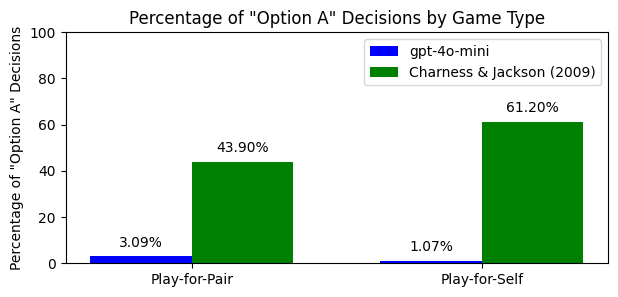

In [27]:
## Percentages

# Play-for-Pair
pp_total_decisions = len(pp_df)
pp_yes_decisions = pp_df[pp_df['stag'] == True].shape[0]
pp_percentage_yes = (pp_yes_decisions / pp_total_decisions) * 100

# Play-for-Self
ps_total_decisions = len(ps_df)
ps_yes_decisions = ps_df[ps_df['stag'] == True].shape[0]
ps_percentage_yes = (ps_yes_decisions / ps_total_decisions) * 100

# Your experiment's percentages
your_percentages = [pp_percentage_yes, ps_percentage_yes]

# Papers Results
paper_pp_percentage = 43.9
paper_ps_percentage = 61.2

paper_percentages = [paper_pp_percentage, paper_ps_percentage]

# Data for plotting
game_types = ['Play-for-Pair', 'Play-for-Self']
x = np.arange(len(game_types))  # the label locations
width = 0.35  # the width of the bars


def boostrap_errors(df):
    sample_size = len(df)
    means = []
    for _ in range(10_000):
        sample = df['stag'].sample(sample_size, replace=True)
        mean = sample.mean()
        means.append(mean)
    return np.percentile(means, [2.5, 97.5])
#pp_df_err = boostrap_errors(pp_df)
#ps_df_err = boostrap_errors(ps_df)
#print(pp_df_err)
#print(ps_df_err)

# Create the bar chart
plt.figure(figsize=(7, 3))
rects1 = plt.bar(x - width/2, your_percentages, width, label='gpt-4o-mini', color=['blue'], capsize=5)
rects2 = plt.bar(x + width/2, paper_percentages, width, label='Charness & Jackson (2009)', color=['green'])

# Add percentage labels on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.annotate(f'{height:.2f}%', 
                     xy=(rect.get_x() + rect.get_width() / 2, height + 1),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Chart formatting
plt.title('Percentage of "Option A" Decisions by Game Type')
plt.ylabel('Percentage of "Option A" Decisions')
plt.xticks(x, game_types)
plt.ylim(0, 100)
plt.legend()
print(f"Play-for-Self Stag( {ps_yes_decisions:03d}; {ps_yes_decisions/ps_total_decisions:.02%} ) Hare( {ps_total_decisions - ps_yes_decisions:03d}; {(ps_total_decisions - ps_yes_decisions)/ps_total_decisions:.02%} )")

print(f"Play-for-Pair Stag( {pp_yes_decisions:03d}; {pp_yes_decisions/pp_total_decisions:.02%} ) Hare( {pp_total_decisions - pp_yes_decisions:03d}; {(pp_total_decisions - pp_yes_decisions)/pp_total_decisions:.02%} )")


plt.show()